## INFO6105 Data Science Engineering Methods

### Final Project

### Angel Fernandes and Venkat Akash Varun

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from statsmodels.multivariate.manova import MANOVA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_csv('measures_v2.csv')
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


In [3]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values)

u_q               0
coolant           0
stator_winding    0
u_d               0
stator_tooth      0
motor_speed       0
i_d               0
i_q               0
pm                0
stator_yoke       0
ambient           0
torque            0
profile_id        0
dtype: int64


In [4]:
df = df.drop_duplicates()
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque,profile_id
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01,17
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01,17
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01,17
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01,17
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60,71
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60,71
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60,71
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60,71


In [5]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330816 entries, 0 to 1330815
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   u_q             1330816 non-null  float64
 1   coolant         1330816 non-null  float64
 2   stator_winding  1330816 non-null  float64
 3   u_d             1330816 non-null  float64
 4   stator_tooth    1330816 non-null  float64
 5   motor_speed     1330816 non-null  float64
 6   i_d             1330816 non-null  float64
 7   i_q             1330816 non-null  float64
 8   pm              1330816 non-null  float64
 9   stator_yoke     1330816 non-null  float64
 10  ambient         1330816 non-null  float64
 11  torque          1330816 non-null  float64
 12  profile_id      1330816 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 132.0 MB
None


In [6]:
# Drop the 'profile_id' column
df = df.drop(columns=['profile_id'], errors='ignore')
df

,u_q,coolant,stator_winding,u_d,stator_tooth,motor_speed,i_d,i_q,pm,stator_yoke,ambient,torque
0,-0.450682,18.805172,19.086670,-0.350055,18.293219,0.002866,0.004419,0.000328,24.554214,18.316547,19.850691,1.871008e-01
1,-0.325737,18.818571,19.092390,-0.305803,18.294807,0.000257,0.000606,-0.000785,24.538078,18.314955,19.850672,2.454175e-01
2,-0.440864,18.828770,19.089380,-0.372503,18.294094,0.002355,0.001290,0.000386,24.544693,18.326307,19.850657,1.766153e-01
3,-0.327026,18.835567,19.083031,-0.316199,18.292542,0.006105,0.000026,0.002046,24.554018,18.330833,19.850647,2.383027e-01
4,-0.471150,18.857033,19.082525,-0.332272,18.291428,0.003133,-0.064317,0.037184,24.565397,18.326662,19.850639,2.081967e-01
...,...,...,...,...,...,...,...,...,...,...,...,...
1330811,-2.152128,30.721298,45.274497,0.791801,41.934347,0.000380,-2.000169,1.097528,62.147780,38.653720,23.989078,-8.116730e-60
1330812,-2.258684,30.721306,45.239017,0.778900,41.868923,0.002985,-2.000499,1.097569,62.142646,38.656328,23.970700,-5.815891e-60
1330813,-2.130312,30.721312,45.211576,0.804914,41.804819,0.002301,-1.999268,1.098765,62.138387,38.650923,23.977234,-4.167268e-60
1330814,-2.268498,30.721316,45.193508,0.763091,41.762220,0.005662,-2.000999,1.095696,62.133422,38.655686,24.001421,-2.985978e-60


In [7]:
# Display basic statistics for numerical columns
print("Basic Statistics for Numerical Columns:")
print(df.describe())

Basic Statistics for Numerical Columns:
                u_q       coolant  stator_winding           u_d  stator_tooth  \
count  1.330816e+06  1.330816e+06    1.330816e+06  1.330816e+06  1.330816e+06   
mean   5.427900e+01  3.622999e+01    6.634275e+01 -2.513381e+01  5.687858e+01   
std    4.417323e+01  2.178615e+01    2.867206e+01  6.309197e+01  2.295223e+01   
min   -2.529093e+01  1.062375e+01    1.858582e+01 -1.315304e+02  1.813398e+01   
25%    1.206992e+01  1.869814e+01    4.278796e+01 -7.869090e+01  3.841601e+01   
50%    4.893818e+01  2.690014e+01    6.511013e+01 -7.429755e+00  5.603635e+01   
75%    9.003439e+01  4.985749e+01    8.814114e+01  1.470271e+00  7.558668e+01   
max    1.330370e+02  1.015985e+02    1.413629e+02  1.314698e+02  1.119464e+02   

        motor_speed           i_d           i_q            pm   stator_yoke  \
count  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06  1.330816e+06   
mean   2.202081e+03 -6.871681e+01  3.741278e+01  5.850678e+01  4.818796e


Outliers in the dataset:


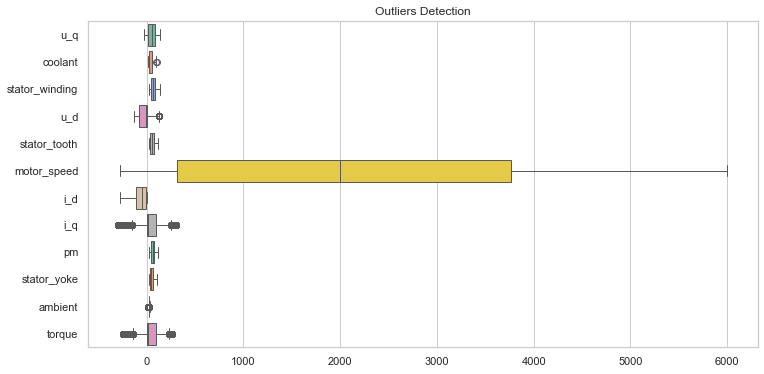

In [8]:
# Check for outliers
print("\nOutliers in the dataset:")
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Boxplot for numerical columns to identify outliers
sns.boxplot(data=df, orient="h", palette="Set2")
plt.title("Outliers Detection")
plt.show()

In [9]:
from scipy.stats import zscore
# Calculate z-scores for each data point in numerical columns
z_scores = zscore(df.select_dtypes(include='number'))

# Define a threshold for z-scores (e.g., 3)
threshold = 3

# Identify and filter out rows with outliers
outliers_mask = (abs(z_scores) < threshold).all(axis=1)
df_no_outliers = df[outliers_mask]

# Display information about removed outliers
outliers_removed = df[~outliers_mask]
print(f"Number of outliers removed: {len(outliers_removed)}")

Number of outliers removed: 7252


In [10]:
# Display basic statistics for the cleaned dataset
print("Basic Statistics for Cleaned Dataset:")
print(df_no_outliers.describe())

# Save the cleaned dataset without outliers
df_no_outliers.to_csv('cleaned_dataset_no_outliers.csv', index=False)

Basic Statistics for Cleaned Dataset:
                u_q       coolant  stator_winding           u_d  stator_tooth  \
count  1.323564e+06  1.323564e+06    1.323564e+06  1.323564e+06  1.323564e+06   
mean   5.448906e+01  3.619076e+01    6.623378e+01 -2.555593e+01  5.681295e+01   
std    4.417981e+01  2.178977e+01    2.865799e+01  6.282822e+01  2.295169e+01   
min   -1.586041e+01  1.291479e+01    1.858582e+01 -1.315304e+02  1.813398e+01   
25%    1.207782e+01  1.869625e+01    4.277806e+01 -7.920554e+01  3.836854e+01   
50%    4.899673e+01  2.685635e+01    6.495630e+01 -7.595001e+00  5.595155e+01   
75%    9.044951e+01  4.985330e+01    8.793866e+01  1.460415e+00  7.553210e+01   
max    1.330370e+02  9.719564e+01    1.413629e+02  1.314698e+02  1.119464e+02   

        motor_speed           i_d           i_q            pm   stator_yoke  \
count  1.323564e+06  1.323564e+06  1.323564e+06  1.323564e+06  1.323564e+06   
mean   2.207209e+03 -6.834261e+01  3.879211e+01  5.848475e+01  4.813856e+0

In [11]:
df_no_outliers.shape

(1323564, 12)

In [12]:
df = df_no_outliers
df.shape

(1323564, 12)

## Exploratory Data Analysis

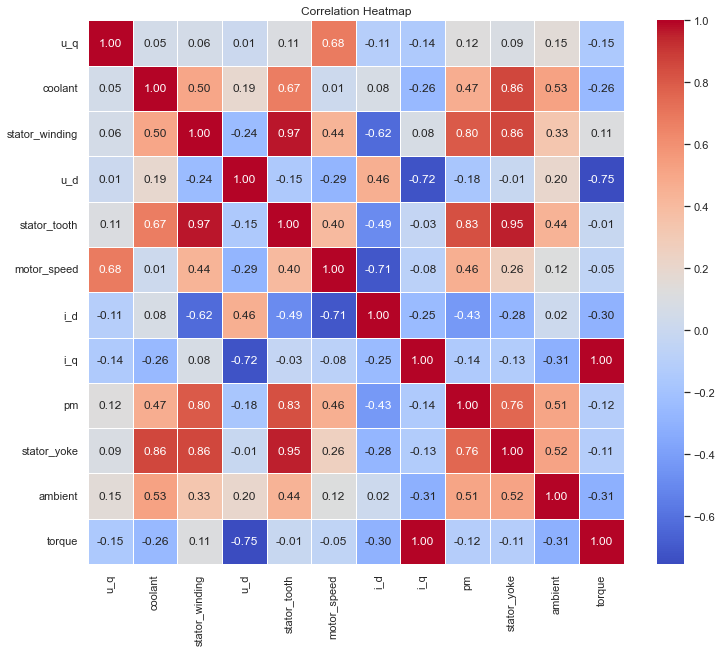

In [13]:
# Generate a correlation matrix
correlation_matrix = df.corr()

# Plot a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

Analyzing the correlations, we see that we have strong correlations in some data, but there is no need to cancel out these variables since it is a direct illumination, as they are technical variations that are naturally correlated, and not a spurious strong brightness.

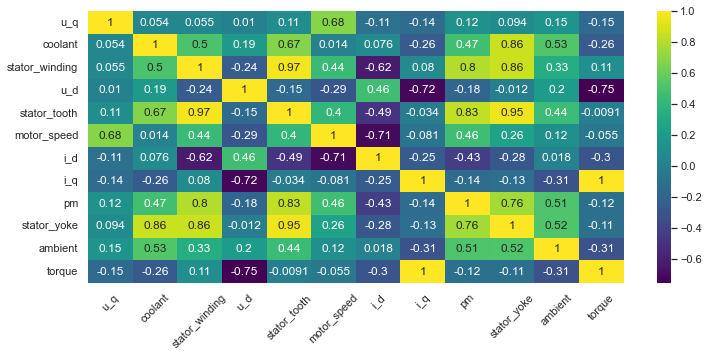

In [14]:
plt.subplots(figsize=(12,5))
gender_correlation=df.corr() #numeric_only=True
sns.heatmap(gender_correlation, annot=True, cmap='viridis')
plt.xticks(rotation=45)
plt.show()

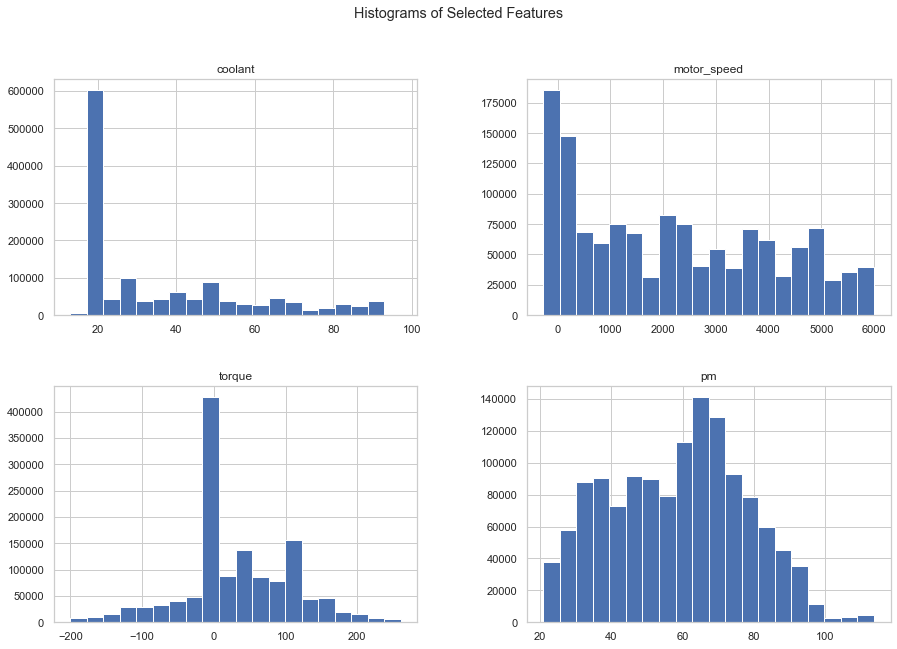

In [44]:
selected_columns = ['coolant', 'stator_winding', 'motor_speed', 'torque', 'pm']
df[selected_columns].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histograms of Selected Features')
plt.show()

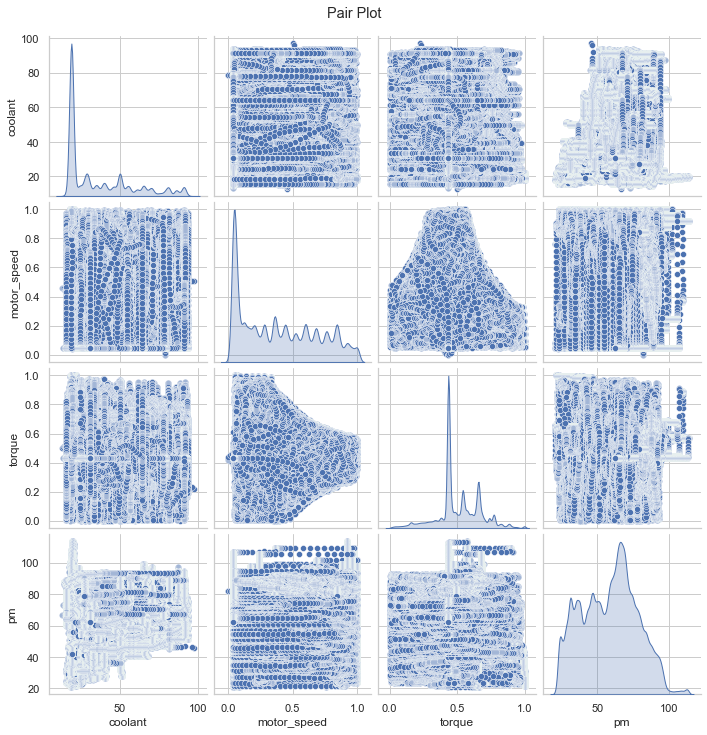

In [47]:
selected_columns = ['coolant', 'stator_winding', 'motor_speed', 'torque', 'pm']
df_selected = df[selected_columns]

# Plot pairwise relationships in the dataset
sns.pairplot(df_selected, diag_kind='kde')
plt.suptitle("Pair Plot", y=1.02)
plt.show()

## Feature Engineering

In [15]:
# 'u_d' and 'u_q' are voltage components, and 'i_d' and 'i_q' are current components in dq-coordinates

# Calculate real power (P) and reactive power (Q)
df['real_power'] = 3/2*(df['u_d'] * df['i_d'] + df['u_q'] * df['i_q'])
df['reactive_power'] = 3/2*(df['u_d'] * df['i_q'] - df['u_q'] * df['i_d'])

# Calculate power magnitude (S) using the Pythagorean theorem
df['power_magnitude'] = (df['real_power']**2 + df['reactive_power']**2)**0.5

df['motor_power'] = df['motor_speed'] * df['torque']

# Display the newly added columns
print(df[['real_power', 'reactive_power', 'power_magnitude', 'motor_power']].head())

   real_power  reactive_power  power_magnitude  motor_power
0   -0.002542        0.002815         0.003793     0.000536
1    0.000106        0.000656         0.000665     0.000063
2   -0.000976        0.000637         0.001166     0.000416
3   -0.001016       -0.000958         0.001396     0.001455
4    0.005777       -0.063987         0.064247     0.000652


/var/folders/yq/ssn56htj0_jdf574hksbbxw00000gn/T/ipykernel_18480/3757937586.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['real_power'] = 3/2*(df['u_d'] * df['i_d'] + df['u_q'] * df['i_q'])
/var/folders/yq/ssn56htj0_jdf574hksbbxw00000gn/T/ipykernel_18480/3757937586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['reactive_power'] = 3/2*(df['u_d'] * df['i_q'] - df['u_q'] * df['i_d'])
/var/folders/yq/ssn56htj0_jdf574hksbbxw00000gn/T/ipykernel_18480/3757937586.py:8: SettingWithCopyWarning: 
A v

## Machine Learning

### Permanent Temperature (pm)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
X = df[['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_winding', 'stator_tooth', 'motor_speed', 'stator_yoke', 'ambient', 'torque', 'motor_power','real_power','reactive_power', 'power_magnitude']]
y = df['pm']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, random_state=42)

# Define and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print('Linear Regression to predict Permanent Temperature')
# Evaluate the model for regression
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Convert 'pm' to binary classes for classification report (example threshold: 25, adjust as needed)
threshold = 25
y_test_binary = (y_test >= threshold).astype(int)
predictions_binary = (predictions >= threshold).astype(int)

# Evaluate the model for classification
classification_rep = classification_report(y_test_binary, predictions_binary)
print("\nClassification Report:")
print(classification_rep)


Linear Regression to predict Permanent Temperature
R-squared: 0.8580
Mean Squared Error: 51.4060

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.10      0.16     16363
           1       0.98      1.00      0.99    645419

    accuracy                           0.97    661782
   macro avg       0.72      0.55      0.58    661782
weighted avg       0.96      0.97      0.97    661782



In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
X = df[['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_winding', 'stator_tooth', 'motor_speed', 'stator_yoke', 'ambient', 'torque', 'motor_power','real_power','reactive_power', 'power_magnitude']]
y = df['pm']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print('Decision Tree to predict Permanent Temperature')
# Evaluate the model for regression
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Convert 'pm' to binary classes for classification report (example threshold: 25, adjust as needed)
threshold = 25
y_test_binary = (y_test >= threshold).astype(int)
predictions_binary = (predictions >= threshold).astype(int)

# Evaluate the model for classification
classification_rep = classification_report(y_test_binary, predictions_binary)
print("\nClassification Report:")
print(classification_rep)


Decision Tree to predict Permanent Temperature
R-squared: 0.9979
Mean Squared Error: 0.7575

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      6545
           1       1.00      1.00      1.00    258168

    accuracy                           1.00    264713
   macro avg       0.99      0.99      0.99    264713
weighted avg       1.00      1.00      1.00    264713



In [18]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
X = df[['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_winding', 'stator_tooth', 'motor_speed', 'stator_yoke', 'ambient', 'torque', 'motor_power','real_power','reactive_power', 'power_magnitude']]
y = df['pm']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print('XGBoost to predict Permanent Temperature')
# Evaluate the model for regression
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Convert 'pm' to binary classes for classification report (example threshold: 25, adjust as needed)
threshold = 25
y_test_binary = (y_test >= threshold).astype(int)
predictions_binary = (predictions >= threshold).astype(int)

# Evaluate the model for classification
classification_rep = classification_report(y_test_binary, predictions_binary)
print("\nClassification Report:")
print(classification_rep)


XGBoost to predict Permanent Temperature
R-squared: 0.9806
Mean Squared Error: 7.0106

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.86      0.86      6545
           1       1.00      1.00      1.00    258168

    accuracy                           0.99    264713
   macro avg       0.92      0.93      0.93    264713
weighted avg       0.99      0.99      0.99    264713



In [19]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
X = df[['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_winding', 'stator_tooth', 'motor_speed', 'stator_yoke', 'ambient', 'torque', 'motor_power','real_power','reactive_power', 'power_magnitude']]
y = df['pm']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print('K-Nearest Neighbors to predict Permanent Temperature')
# Evaluate the model for regression
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Convert 'pm' to binary classes for classification report (example threshold: 25, adjust as needed)
threshold = 25
y_test_binary = (y_test >= threshold).astype(int)
predictions_binary = (predictions >= threshold).astype(int)

# Evaluate the model for classification
classification_rep = classification_report(y_test_binary, predictions_binary)
print("\nClassification Report:")
print(classification_rep)


K-Nearest Neighbors to predict Permanent Temperature
R-squared: 0.8935
Mean Squared Error: 38.5457

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      6545
           1       1.00      1.00      1.00    258168

    accuracy                           1.00    264713
   macro avg       0.98      0.96      0.97    264713
weighted avg       1.00      1.00      1.00    264713



### Motor Power

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
X = df[['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_winding', 'stator_tooth', 'pm', 'stator_yoke', 'ambient', 'torque', 'motor_speed']]
y = df['motor_power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print('Linear Regression to predict Motor Power')
# Evaluate the model for regression
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Convert 'pm' to binary classes for classification report (example threshold: 25, adjust as needed)
threshold = 25
y_test_binary = (y_test >= threshold).astype(int)
predictions_binary = (predictions >= threshold).astype(int)

# Evaluate the model for classification
classification_rep = classification_report(y_test_binary, predictions_binary)
print("\nClassification Report:")
print(classification_rep)


Linear Regression to predict Motor Power
R-squared: 0.9973
Mean Squared Error: 84806611.8901

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83    114451
           1       0.84      0.94      0.89    150262

    accuracy                           0.87    264713
   macro avg       0.88      0.86      0.86    264713
weighted avg       0.87      0.87      0.87    264713



In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
X = df[['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_winding', 'stator_tooth', 'pm', 'stator_yoke', 'ambient', 'torque', 'motor_speed']]
y = df['motor_power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print('Decision Tree to predict Motor Power')
# Evaluate the model for regression
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Convert 'pm' to binary classes for classification report (example threshold: 25, adjust as needed)
threshold = 25
y_test_binary = (y_test >= threshold).astype(int)
predictions_binary = (predictions >= threshold).astype(int)

# Evaluate the model for classification
classification_rep = classification_report(y_test_binary, predictions_binary)
print("\nClassification Report:")
print(classification_rep)


Decision Tree to predict Motor Power
R-squared: 0.9999
Mean Squared Error: 3843565.9847

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    114451
           1       1.00      1.00      1.00    150262

    accuracy                           1.00    264713
   macro avg       1.00      1.00      1.00    264713
weighted avg       1.00      1.00      1.00    264713



In [22]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
X = df[['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_winding', 'stator_tooth', 'pm', 'stator_yoke', 'ambient', 'torque', 'motor_speed']]
y = df['motor_power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print('XGBoost to predict Motor Power')
# Evaluate the model for regression
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Convert 'pm' to binary classes for classification report (example threshold: 25, adjust as needed)
threshold = 25
y_test_binary = (y_test >= threshold).astype(int)
predictions_binary = (predictions >= threshold).astype(int)

# Evaluate the model for classification
classification_rep = classification_report(y_test_binary, predictions_binary)
print("\nClassification Report:")
print(classification_rep)


XGBoost to predict Motor Power
R-squared: 0.9999
Mean Squared Error: 4207459.9870

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.87      0.92    114451
           1       0.91      0.98      0.94    150262

    accuracy                           0.93    264713
   macro avg       0.94      0.92      0.93    264713
weighted avg       0.93      0.93      0.93    264713



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
X = df[['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_winding', 'stator_tooth', 'pm', 'stator_yoke', 'ambient', 'torque', 'motor_speed']]
y = df['motor_power']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print('K-Nearest Neighbors to predict Motor Power')
# Evaluate the model for regression
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Convert 'pm' to binary classes for classification report (example threshold: 25, adjust as needed)
threshold = 25
y_test_binary = (y_test >= threshold).astype(int)
predictions_binary = (predictions >= threshold).astype(int)

# Evaluate the model for classification
classification_rep = classification_report(y_test_binary, predictions_binary)
print("\nClassification Report:")
print(classification_rep)


K-Nearest Neighbors to predict Motor Power
R-squared: 0.9997
Mean Squared Error: 9123103.2450

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    114451
           1       0.99      0.99      0.99    150262

    accuracy                           0.99    264713
   macro avg       0.99      0.99      0.99    264713
weighted avg       0.99      0.99      0.99    264713



### Stator Winding Temperature

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
X = df[['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_tooth', 'motor_speed', 'stator_yoke', 'ambient', 'torque', 'pm']]
y = df['stator_winding']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print('Linear Regression to predict Stator Winding Temperature')
# Evaluate the model for regression
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Convert 'pm' to binary classes for classification report (example threshold: 25, adjust as needed)
threshold = 25
y_test_binary = (y_test >= threshold).astype(int)
predictions_binary = (predictions >= threshold).astype(int)

# Evaluate the model for classification
classification_rep = classification_report(y_test_binary, predictions_binary)
print("\nClassification Report:")
print(classification_rep)


Linear Regression to predict Stator Winding Temperature
R-squared: 0.9960
Mean Squared Error: 3.3107

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     21267
           1       1.00      1.00      1.00    243446

    accuracy                           0.99    264713
   macro avg       0.97      0.98      0.98    264713
weighted avg       0.99      0.99      0.99    264713



In [25]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
X = df[['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_tooth', 'motor_speed', 'stator_yoke', 'ambient', 'torque', 'pm']]
y = df['stator_winding']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print('Decision Tree to predict Stator Winding Temperature')
# Evaluate the model for regression
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Convert 'pm' to binary classes for classification report (example threshold: 25, adjust as needed)
threshold = 25
y_test_binary = (y_test >= threshold).astype(int)
predictions_binary = (predictions >= threshold).astype(int)

# Evaluate the model for classification
classification_rep = classification_report(y_test_binary, predictions_binary)
print("\nClassification Report:")
print(classification_rep)


Decision Tree to predict Stator Winding Temperature
R-squared: 0.9998
Mean Squared Error: 0.1523

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21267
           1       1.00      1.00      1.00    243446

    accuracy                           1.00    264713
   macro avg       1.00      1.00      1.00    264713
weighted avg       1.00      1.00      1.00    264713



In [26]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
X = df[['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_tooth', 'motor_speed', 'stator_yoke', 'ambient', 'torque', 'pm']]
y = df['stator_winding']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print('XGBoost to predict Stator Winding Temperature')
# Evaluate the model for regression
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Convert 'pm' to binary classes for classification report (example threshold: 25, adjust as needed)
threshold = 25
y_test_binary = (y_test >= threshold).astype(int)
predictions_binary = (predictions >= threshold).astype(int)

# Evaluate the model for classification
classification_rep = classification_report(y_test_binary, predictions_binary)
print("\nClassification Report:")
print(classification_rep)


XGBoost to predict Stator Winding Temperature
R-squared: 0.9986
Mean Squared Error: 1.1488

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     21267
           1       1.00      1.00      1.00    243446

    accuracy                           1.00    264713
   macro avg       1.00      0.98      0.99    264713
weighted avg       1.00      1.00      1.00    264713



In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming df is your DataFrame
X = df[['u_q', 'u_d', 'i_d', 'i_q', 'coolant', 'stator_tooth', 'motor_speed', 'stator_yoke', 'ambient', 'torque', 'pm']]
y = df['stator_winding']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the model
model = KNeighborsRegressor()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

print('K-Nearest Neighbors to predict Stator Winding Temperature')
# Evaluate the model for regression
r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print(f'R-squared: {r2:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

# Convert 'pm' to binary classes for classification report (example threshold: 25, adjust as needed)
threshold = 25
y_test_binary = (y_test >= threshold).astype(int)
predictions_binary = (predictions >= threshold).astype(int)

# Evaluate the model for classification
classification_rep = classification_report(y_test_binary, predictions_binary)
print("\nClassification Report:")
print(classification_rep)



K-Nearest Neighbors to predict Stator Winding Temperature
R-squared: 0.9888
Mean Squared Error: 9.2169

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     21267
           1       1.00      1.00      1.00    243446

    accuracy                           1.00    264713
   macro avg       1.00      1.00      1.00    264713
weighted avg       1.00      1.00      1.00    264713



### Linear Discriminant Analysis (LDA) of Temperature of Cars with Electric Motors: Stator Winding

In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from statsmodels.multivariate.manova import MANOVA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

Functions to be used

In [29]:
def stepwise_selection(X, y):
    included = [] 
    while True:
        changed = False
        remaining = list(set(X.columns) - set(included))
        best_pvalue = 1  
        for feature in remaining:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included + [feature]]))).fit()
            pvalue = model.pvalues[feature]
            if pvalue < best_pvalue:
                best_pvalue = pvalue
                best_feature = feature
        if best_pvalue < 0.05:  
            included.append(best_feature)
            changed = True
        if not changed:
            break
    print("Variables selected by the stepwise method:\n", included)
    return included

def plot_uniform(X):
    num_columns = X.shape[1]
    num_rows = int(np.ceil(num_columns / 2))
    fig, axs = plt.subplots(num_rows, 2, figsize=(12, 24))
    cols = list(X.columns)
    for i in range(num_columns):
        row = i // 2
        col = i % 2
        measurements = X.iloc[:, i] - np.mean(X.iloc[:, i])
        ax = axs[row, col]
        stats.probplot(measurements, dist="norm", plot=ax)
        ax.set_title(f"Q-Q Plot -  {cols[i]}")

    plt.tight_layout()
    plt.show()  

def qualiQuantiVariablesAnalysis(data, varName1, varName2, ax=None):
    if ax is None:
        _, ax = plt.subplots(figsize=(6, 4))
    title = varName1 + " per " + varName2
    ax.set_title(title, fontsize=12)

    sns.boxplot(data=data, x=varName2, y=varName1, ax=ax)
    ax.set_ylabel(varName1, fontsize=12)
    ax.set_xlabel(varName2, fontsize=12)

In [30]:
target = 'stator_winding'
levels = ['normal', 'heating', 'hot', 'risk']

Arriving normal distribution of target data using quantile-by-quantile plot

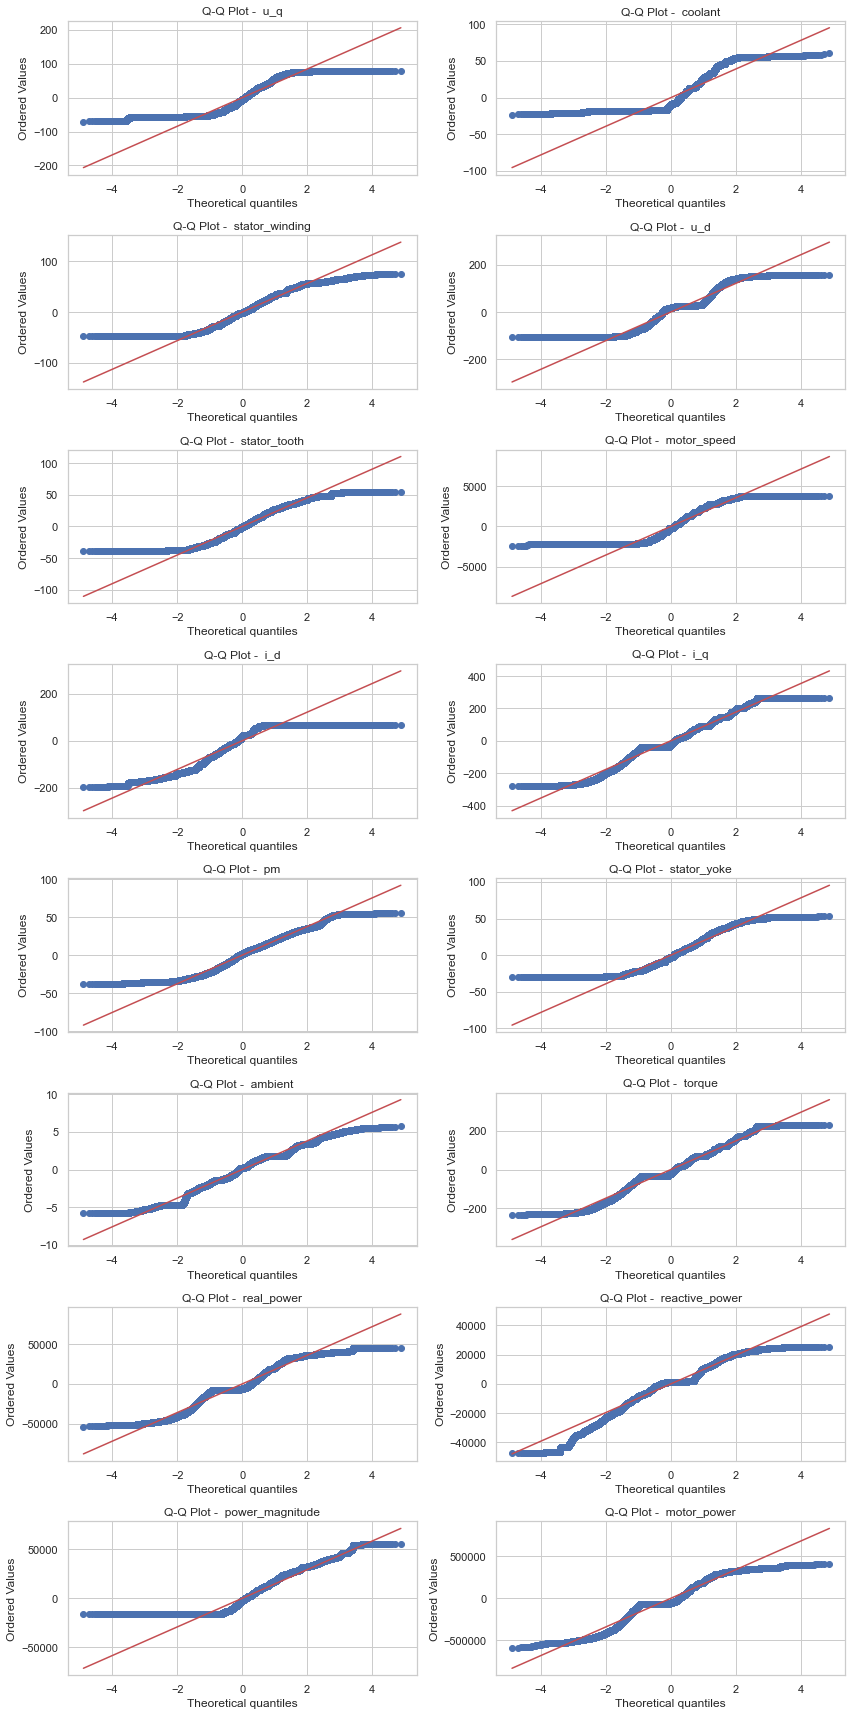

In [31]:
plot_uniform(df)

In [32]:
vars = stepwise_selection(df.drop(target, axis=1), df[target])

Variables selected by the stepwise method:
 ['i_q', 'pm', 'u_d', 'ambient', 'i_d', 'power_magnitude', 'motor_power', 'coolant', 'stator_tooth', 'stator_yoke', 'motor_speed', 'real_power', 'reactive_power', 'torque', 'u_q']


Categorizing target variable

In [33]:
categorized_data = pd.qcut(df[target], q=4, labels=levels)
df[target]  = categorized_data

/var/folders/yq/ssn56htj0_jdf574hksbbxw00000gn/T/ipykernel_18480/2412284284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[target]  = categorized_data


Plotting categorical boxplot using engine temperature

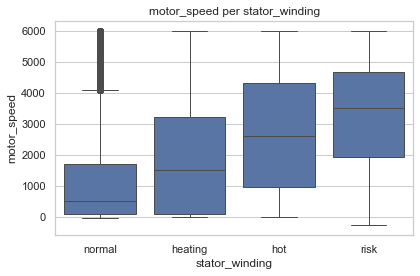

In [34]:
qualiQuantiVariablesAnalysis(df, 'motor_speed', target)
plt.tight_layout()
plt.show()

Separating training set 80% and test 20%

In [35]:
train, test = train_test_split(df, test_size = 0.2, random_state = 17)
X, Y = train[vars], train[target]

/var/folders/yq/ssn56htj0_jdf574hksbbxw00000gn/T/ipykernel_18480/2496998968.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for classe, grupo in test_grap.groupby(target):


Text(0.5, 1.0, 'stator_winding by motor_speed x stator_tooth')

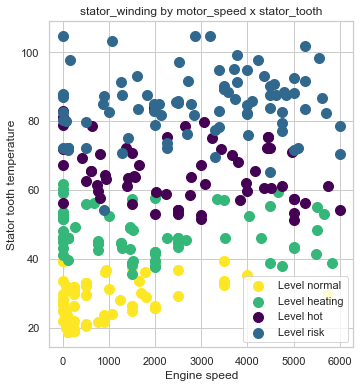

In [36]:
train_, test_grap = train_test_split(train, test_size = 0.0003, random_state = 17)

categorias = test_grap[target].unique()
num_cores = len(categorias)
palette = plt.get_cmap('viridis', num_cores)
cores = {cat: palette(i) for i, cat in enumerate(categorias)}

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)

for classe, grupo in test_grap.groupby(target):
    marcador = 'o'  
    cor = cores[classe]  
    ax1.scatter(grupo['motor_speed'], grupo['stator_tooth'], c=[cor], s=100, marker=marcador, label='Level '+ classe)

ax1.set_xlabel('Engine speed')
ax1.set_ylabel('Stator tooth temperature')
ax1.legend()
ax1.set_title('stator_winding by motor_speed x stator_tooth')

In [37]:
lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)
print('Discriminate model score: ',lda.score(X, Y))

print('Centroids: ')
print(lda.scalings_)

print('The coefficients of determination for each class for each of the columns')
print(lda.coef_)

test_pre = lda.predict(test[vars])
print(classification_report(test[target], test_pre))

Discriminate model score:  0.9315163323262668
Centroids: 
[[-4.68978831e-02  3.33812293e-02 -2.78289727e-02]
 [-1.69480863e-02 -1.49625156e-02  1.90572031e-02]
 [-2.78688345e-02  3.88584363e-02 -6.46584052e-02]
 [ 8.74082272e-03 -2.00269576e-01 -7.48160263e-02]
 [ 1.02544688e-02 -1.40637388e-02 -1.58338618e-03]
 [ 6.19032111e-05 -2.50201872e-04 -5.47019160e-05]
 [-2.24581192e-05  1.79615002e-05 -5.54108015e-05]
 [ 2.78660941e-02  5.86968834e-02 -1.17882690e-01]
 [ 2.94299525e-01  9.73775943e-02 -2.10347645e-01]
 [-1.80728562e-01 -1.43120252e-01  3.19508125e-01]
 [-2.16150491e-04  1.72928797e-03  3.04343646e-04]
 [ 1.09317191e-04 -2.28731466e-05  3.06564698e-04]
 [ 4.16115653e-05 -2.28728910e-04 -6.32713982e-05]
 [ 5.86340524e-02 -4.43228843e-02  4.38452179e-02]
 [-2.41457234e-03 -1.81018648e-02 -3.35941637e-03]]
The coefficients of determination for each class for each of the columns
[[ 4.23100420e-02  3.70288038e-02  2.98877368e-03  7.65045624e-02
  -7.51964006e-03  3.22025423e-05  8.

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Split the data
train, test = train_test_split(df, test_size=0.2, random_state=17)
X_train, y_train = train[vars], train[target]
X_test, y_test = test[vars], test[target]

In [39]:
from sklearn.neighbors import KNeighborsClassifier

# k-Nearest Neighbors Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


# Model Evaluation for k-NN
knn_train_accuracy = knn_classifier.score(X_train, y_train)
knn_test_accuracy = knn_classifier.score(X_test, y_test)
print(f"k-NN - Training Accuracy: {knn_train_accuracy:.4f}, Testing Accuracy: {knn_test_accuracy:.4f}")

k-NN - Training Accuracy: 0.9004, Testing Accuracy: 0.8488


In [40]:
from sklearn.metrics import classification_report

knn_predictions = knn_classifier.predict(X_test)

# Classification Report for k-NN
print("\nk-NN Classification Report:")
print(classification_report(y_test, knn_predictions))


k-NN Classification Report:
              precision    recall  f1-score   support

     heating       0.84      0.85      0.84     66165
         hot       0.72      0.79      0.76     66402
      normal       0.99      0.96      0.97     66140
        risk       0.86      0.80      0.83     66006

    accuracy                           0.85    264713
   macro avg       0.85      0.85      0.85    264713
weighted avg       0.85      0.85      0.85    264713



In [41]:
import xgboost as xgb
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# XGBoost Classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(levels), random_state=17)
xgb_classifier.fit(X_train, y_train_encoded)

# Model Evaluation for XGBoost
xgb_train_accuracy = xgb_classifier.score(X_train, y_train_encoded)
xgb_test_accuracy = xgb_classifier.score(X_test, y_test_encoded)
print(f"XGBoost - Training Accuracy: {xgb_train_accuracy:.4f}, Testing Accuracy: {xgb_test_accuracy:.4f}")

# Predictions for XGBoost
xgb_predictions = xgb_classifier.predict(X_test)

# Classification Report for XGBoost
print("\nXGBoost Classification Report:")
print(classification_report(y_test_encoded, xgb_predictions))



XGBoost - Training Accuracy: 0.9963, Testing Accuracy: 0.9941

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     66165
           1       0.99      0.99      0.99     66402
           2       1.00      1.00      1.00     66140
           3       1.00      0.99      1.00     66006

    accuracy                           0.99    264713
   macro avg       0.99      0.99      0.99    264713
weighted avg       0.99      0.99      0.99    264713



In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

# Gaussian Naive Bayes Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Model Evaluation for Gaussian Naive Bayes
nb_train_accuracy = nb_classifier.score(X_train, y_train)
nb_test_accuracy = nb_classifier.score(X_test, y_test)
print(f"Gaussian Naive Bayes - Training Accuracy: {nb_train_accuracy:.4f}, Testing Accuracy: {nb_test_accuracy:.4f}")

# Predictions for Gaussian Naive Bayes
nb_predictions = nb_classifier.predict(X_test)

# Classification Report for Gaussian Naive Bayes
print("\nGaussian Naive Bayes Classification Report:")
print(classification_report(y_test, nb_predictions))


Gaussian Naive Bayes - Training Accuracy: 0.8121, Testing Accuracy: 0.8125

Gaussian Naive Bayes Classification Report:
              precision    recall  f1-score   support

     heating       0.74      0.75      0.74     66165
         hot       0.73      0.74      0.74     66402
      normal       0.90      0.91      0.90     66140
        risk       0.89      0.85      0.87     66006

    accuracy                           0.81    264713
   macro avg       0.81      0.81      0.81    264713
weighted avg       0.81      0.81      0.81    264713

